In [1]:
!pip install pywaffle
!pip install highlight_text
!pip install mplsoccer
!pip install statsbombpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.6/25.6 MB 11.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.4/79.4 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.4/61.4 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 7.3 MB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pywaffle import Waffle
from highlight_text import fig_text
from statsbombpy import sb
from mplsoccer import Pitch
from mplsoccer import VerticalPitch, add_image

##Goles Esperados


###Goles Esperados Anotados VS Goles Esperados Recibidos

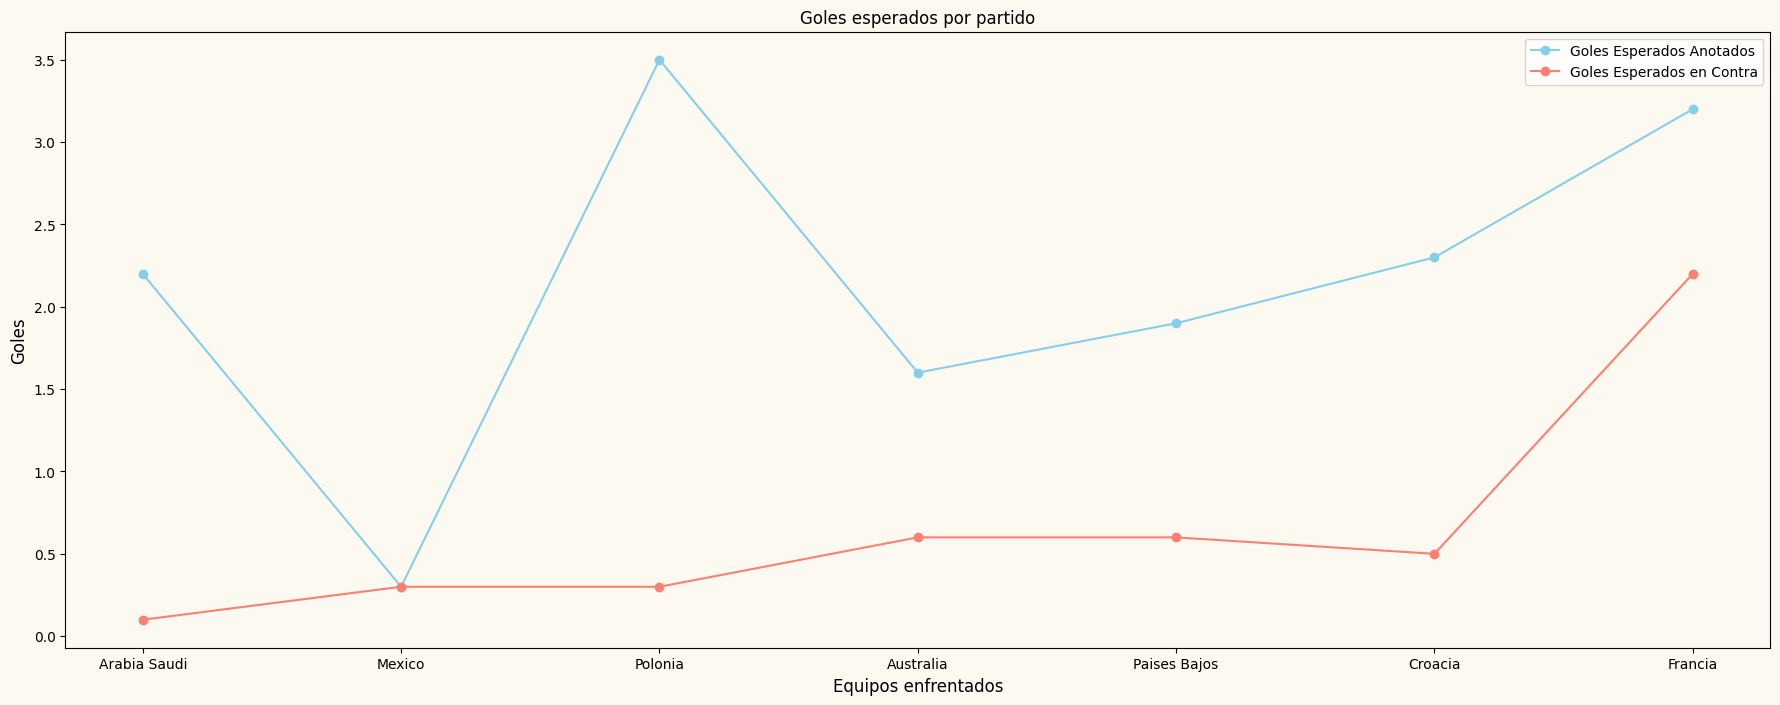

In [3]:
df_partidos = pd.read_excel('GolesEsperados.xlsx')

df_partidos

goles = df_partidos[['Equipo1', 'Equipo2', 'GolesEsperadosArg', 'GolesEsperados']]

x = []    #Nombres de los equipos en contra de Argentina
y1 = []   #Goles espereados por Argentina
y2 = []   #Goles esperados por el contrario

# Datos
for i in range(0, len(goles['Equipo1'])):
  x.append(goles.loc[i]['Equipo2'])
  y1.append(goles.loc[i]['GolesEsperadosArg'])
  y2.append(goles.loc[i]['GolesEsperados'])

# Gráfico de líneas
fig, ax = plt.subplots(figsize=(22,8),facecolor = '#fcf9f0')
ax.plot(x, y1, marker = "o", label = "Goles Esperados Anotados", color = 'skyblue')
ax.plot(x, y2, marker = "o", label = "Goles Esperados en Contra", color = 'salmon')
plt.xlabel("Equipos enfrentados", size = 12)
plt.ylabel("Goles", size = 12)
ax.legend()
ax.title.set_text('Goles esperados por partido')
ax.set_facecolor('#fcf9f0')

plt.savefig("Goles_anotados_esperados.jpg")
plt.show()

###Goles Esperados Anotados VS Goles Anotados


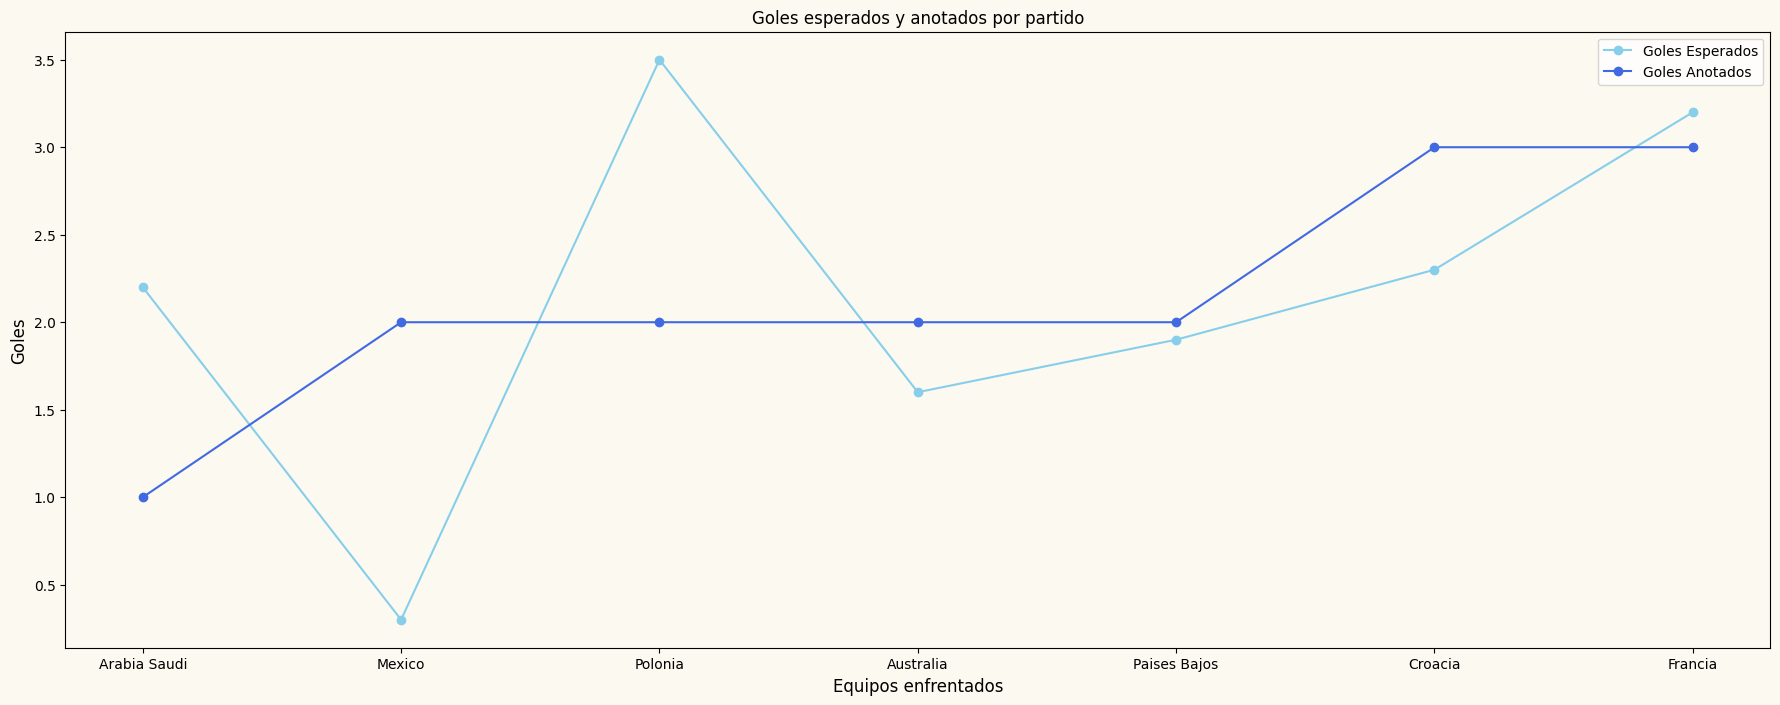

In [4]:
df_partidos = pd.read_excel('GolesEsperados.xlsx')

df_partidos

goles = df_partidos[['Equipo1', 'Equipo2', 'GolesEsperadosArg', 'GolesArg']]

x = []    #Nombres de los equipos en contra de Argentina
y1 = []   #Goles espereados anotados por Argentina
y2 = []   #Goles anotados

# Datos
for i in range(0, len(goles['Equipo1'])):
  x.append(goles.loc[i]['Equipo2'])
  y1.append(goles.loc[i]['GolesEsperadosArg'])
  y2.append(goles.loc[i]['GolesArg'])

# Gráfico de líneas
fig, ax = plt.subplots(figsize=(22,8),facecolor = '#fcf9f0')
ax.plot(x, y1, marker = "o", label = "Goles Esperados", color = 'skyblue')
ax.plot(x, y2, marker = "o", label = "Goles Anotados", color = 'royalblue')
plt.xlabel("Equipos enfrentados", size = 12)
plt.ylabel("Goles", size = 12)
ax.legend()
ax.title.set_text('Goles esperados y anotados por partido')
ax.set_facecolor('#fcf9f0')

plt.savefig("Goles_anotados.jpg")
plt.show()

###Goles Esperados en Contra VS Goles Recibidos


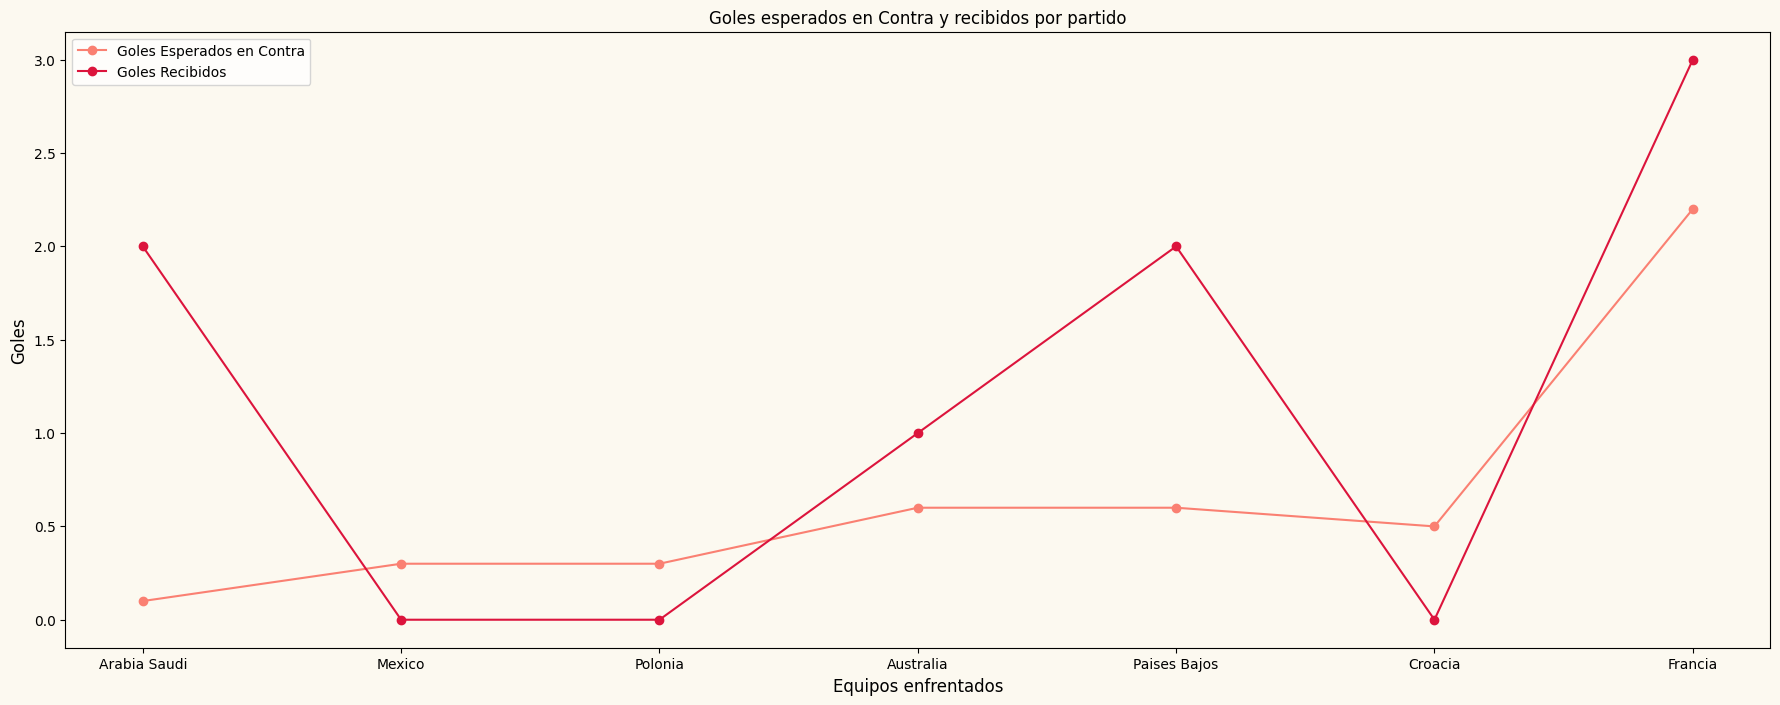

In [5]:
df_partidos = pd.read_excel('GolesEsperados.xlsx')

df_partidos

goles = df_partidos[['Equipo1', 'Equipo2', 'GolesEsperados', 'Goles']]

x = []    #Nombres de los equipos en contra de Argentina
y1 = []   #Goles espereados anotados por Argentina
y2 = []   #Goles anotados

# Datos
for i in range(0, len(goles['Equipo1'])):
  x.append(goles.loc[i]['Equipo2'])
  y1.append(goles.loc[i]['GolesEsperados'])
  y2.append(goles.loc[i]['Goles'])

# Gráfico de líneas
fig, ax = plt.subplots(figsize=(22,8),facecolor = '#fcf9f0')
ax.plot(x, y1, marker = "o", label = "Goles Esperados en Contra", color = 'salmon')
ax.plot(x, y2, marker = "o", label = "Goles Recibidos", color = 'crimson')
plt.xlabel("Equipos enfrentados", size = 12)
plt.ylabel("Goles", size = 12)
ax.legend()
ax.title.set_text('Goles esperados en Contra y recibidos por partido')
ax.set_facecolor('#fcf9f0')

plt.savefig("Goles_recibidos.jpg")
plt.show()

##Analisis Goles y Asistencias por jugador (toda el mundial) (tablas de calor)


In [6]:
df_completo = pd.read_excel('PartidosJugadoresArgentina.xlsx')

df_completo = df_completo.groupby(['Jugador'], as_index = False).sum()
df_completo.columns

Index(['Jugador', 'vs', 'Mín', 'Gls.', 'Ass', 'TP', 'TPint', 'Dis', 'DaP',
       'TA', 'TR', 'Toques', 'Tkl', 'Int', 'Bloqueos', 'xG', 'npxG', 'xAG',
       'ACT', 'ACG', 'Cmp', 'Int.', '% Cmp', 'PrgP', 'Transportes', 'PrgC',
       'Att', 'Succ'],
      dtype='object')

<ipython-input-7-ebeb41e1f559>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'Gls.': 'Goles', 'Ass': 'Asistencias', 'xG':'Goles Esperados', 'xAG':'Asistencias Esperadas'}, inplace=True)


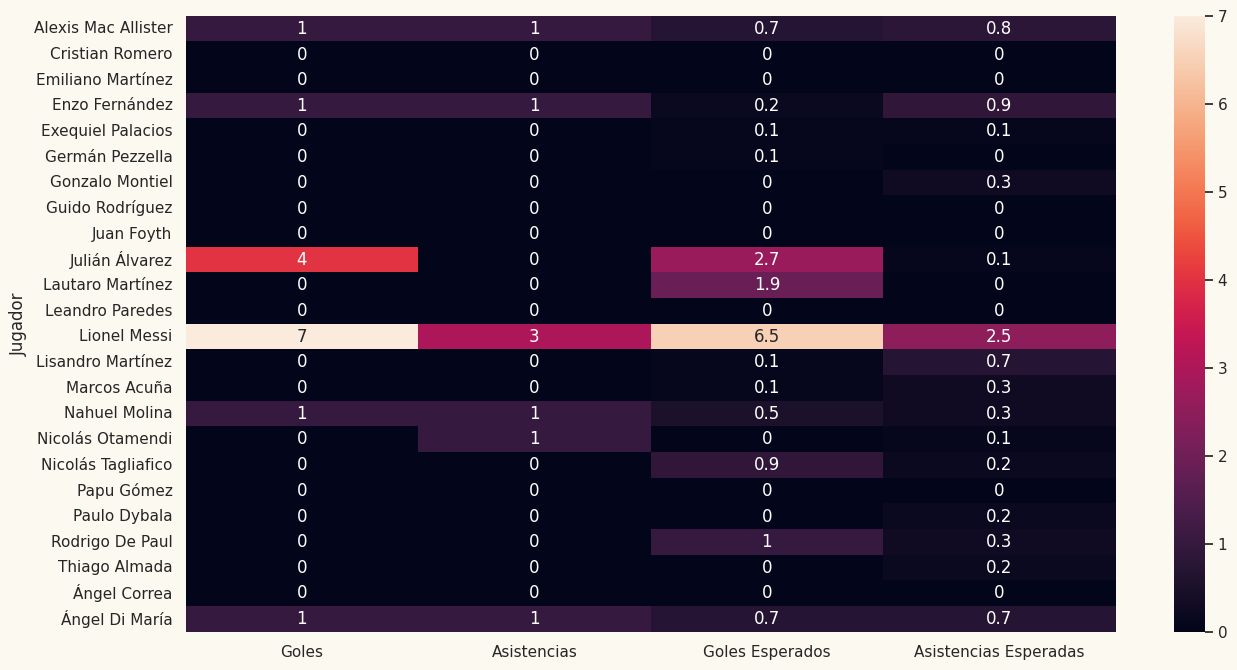

In [7]:
from pandas import DataFrame
df = df_completo[['Jugador','Gls.','Ass', 'xG', 'xAG']]
df.rename(columns={'Gls.': 'Goles', 'Ass': 'Asistencias', 'xG':'Goles Esperados', 'xAG':'Asistencias Esperadas'}, inplace=True)

df.set_index('Jugador', inplace=True)

sns.set(rc = {'figure.figsize':(15,8), 'figure.facecolor':'#fcf9f0'})
fig = sns.heatmap(df,annot=True)

<Axes: ylabel='Jugador'>

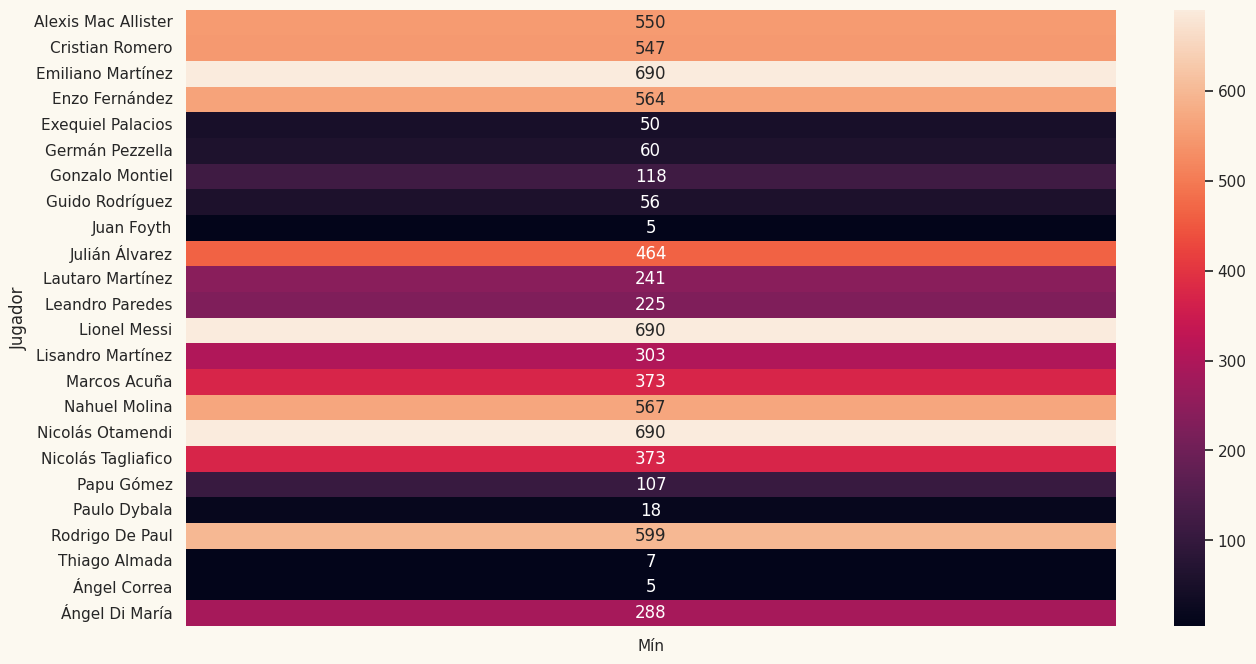

In [8]:
df2 = df_completo[['Jugador','Mín']]
df2.set_index('Jugador', inplace = True)

sns.set(rc = {'figure.figsize':(15,8), 'figure.facecolor':'#fcf9f0'})
sns.heatmap(df2,annot=True,fmt=".0f",)

##Analisis de bloqueos e intercepciones


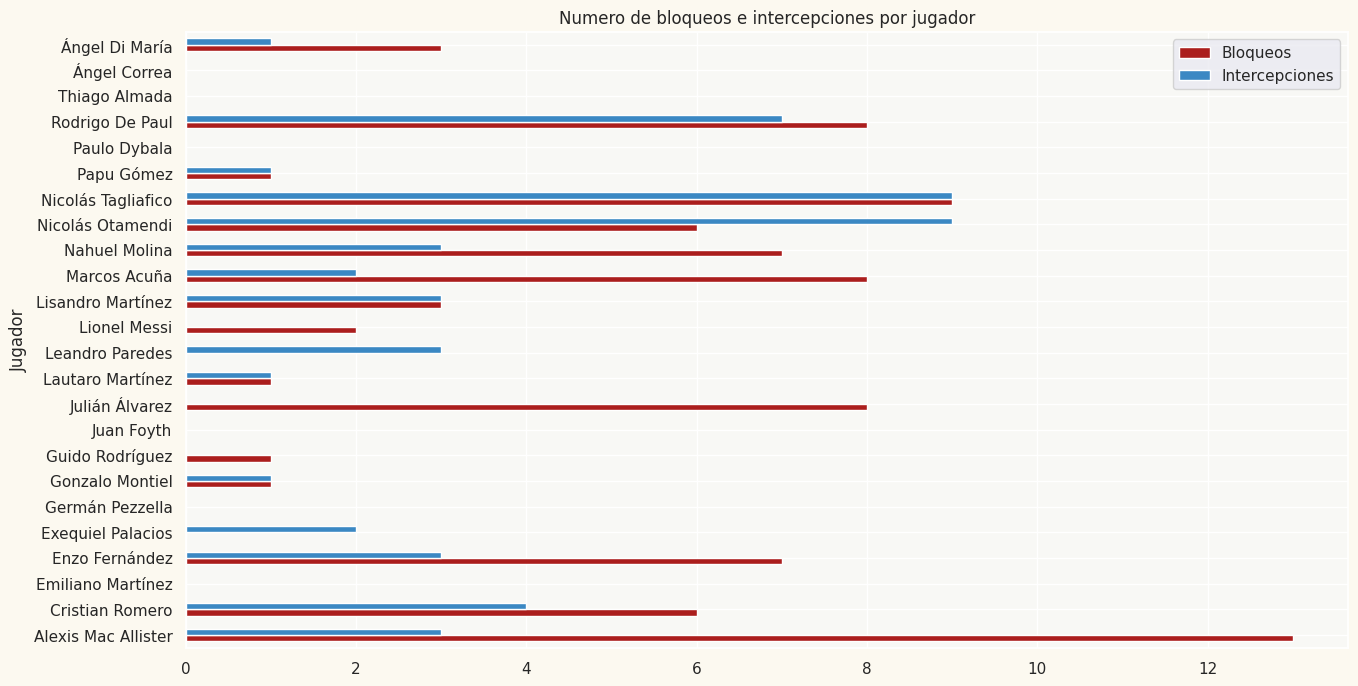

In [9]:
df_bloqueos  = df_completo[['Jugador', 'Bloqueos', 'Int']]
df_bloqueos = df_bloqueos.rename(columns={'Int':'Intercepciones'})
df_bloqueos.set_index('Jugador', inplace=True)

colores = ["#AB1E1D","#3B88C3"]
ax = df_bloqueos.plot.barh(color = colores)

ax.set_facecolor('#F8F8F5')

ax.title.set_text('Numero de bloqueos e intercepciones por jugador')

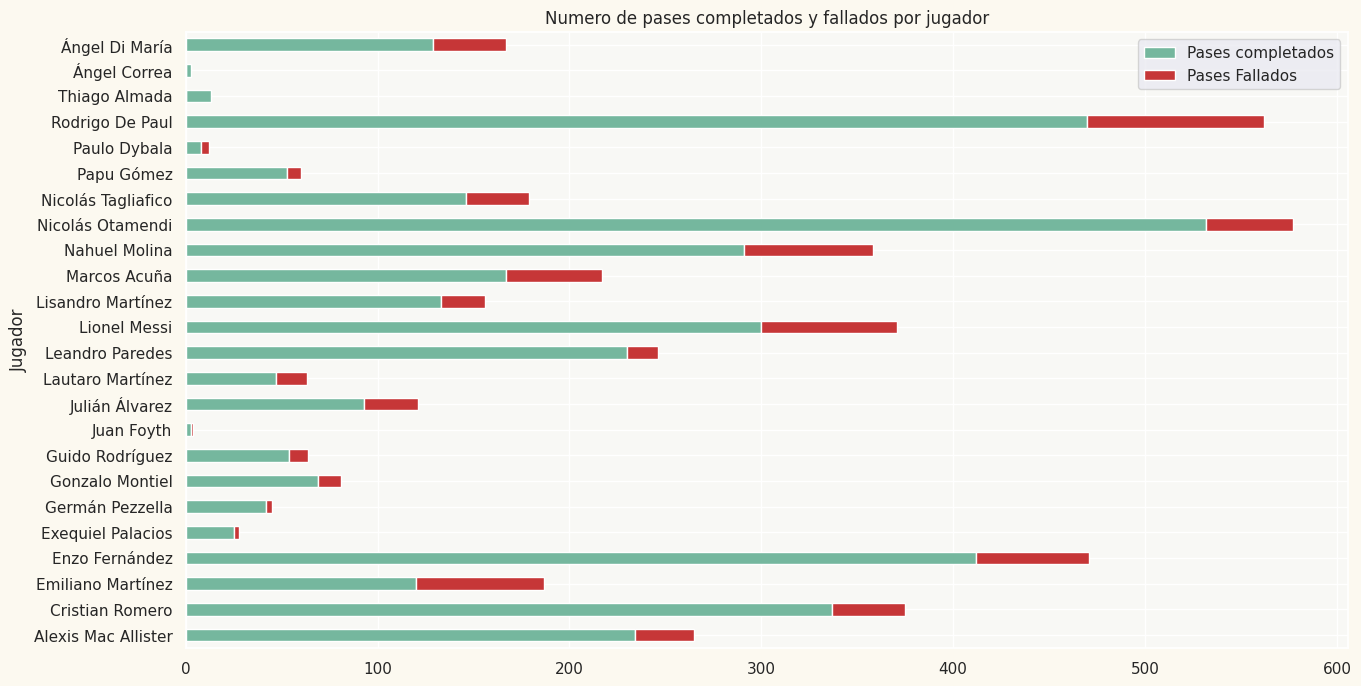

In [10]:
df_pases  = df_completo[['Jugador', 'Cmp', 'Int.']]
df_pases = df_pases.rename(columns={'Int.':'Pases Intentados', 'Cmp':'Pases completados'})

x = []

colores = ["#75b79e","#c63637"]

for i in range(0,len(df_pases['Jugador'])):
  resta = (df_pases.loc[i]['Pases Intentados'] - df_pases.loc[i]['Pases completados'])
  x.append(resta)

df_pases.insert(2,'Pases Fallados',x)
df_pases = df_pases.drop('Pases Intentados', axis=1)
df_pases.set_index('Jugador', inplace=True)

ax = df_pases.plot.barh(stacked=True,color = colores)
ax.set_facecolor('#F8F8F5')
ax.title.set_text('Numero de pases completados y fallados por jugador')

##Analisis de pases

In [11]:
equipo = "Francia"

final_pases = pd.read_excel(equipo+'_pases.xlsx')

final_pases = final_pases.sort_values(by=['Toques'], ascending=False)

final_pases = final_pases.drop(len(final_pases)-1)

final_pases = final_pases.drop('Toques', axis = 1)

final_pases = final_pases.T

final_pases.columns = final_pases.iloc[0]

final_pases = final_pases.drop('Jugador')

lista = final_pases.columns.values.tolist()

final_pases = pd.DataFrame(final_pases, columns=lista)

In [12]:
final_pases

,Enzo Fernández,Cristian Romero,Nicolás Otamendi,Rodrigo De Paul,Lionel Messi,Alexis Mac Allister,Nicolás Tagliafico,Nahuel Molina,Ángel Di María,Marcos Acuña,Julián Álvarez,Emiliano Martínez,Leandro Paredes,Gonzalo Montiel,Lautaro Martínez,Paulo Dybala,Germán Pezzella
Def. pen.,4,15,4,1,0,1,3,5,0,1,0,30,0,1,0,1,0
3.º def.,28,61,49,20,6,10,18,22,3,3,1,37,2,3,0,1,0
3.º cent.,67,25,33,40,26,37,34,26,20,18,19,0,13,8,4,2,1
3.º ataq.,19,1,0,23,48,26,14,12,21,19,19,0,2,6,9,1,0
Ataq. pen.,1,0,0,4,7,1,1,0,5,1,3,0,0,1,4,0,0


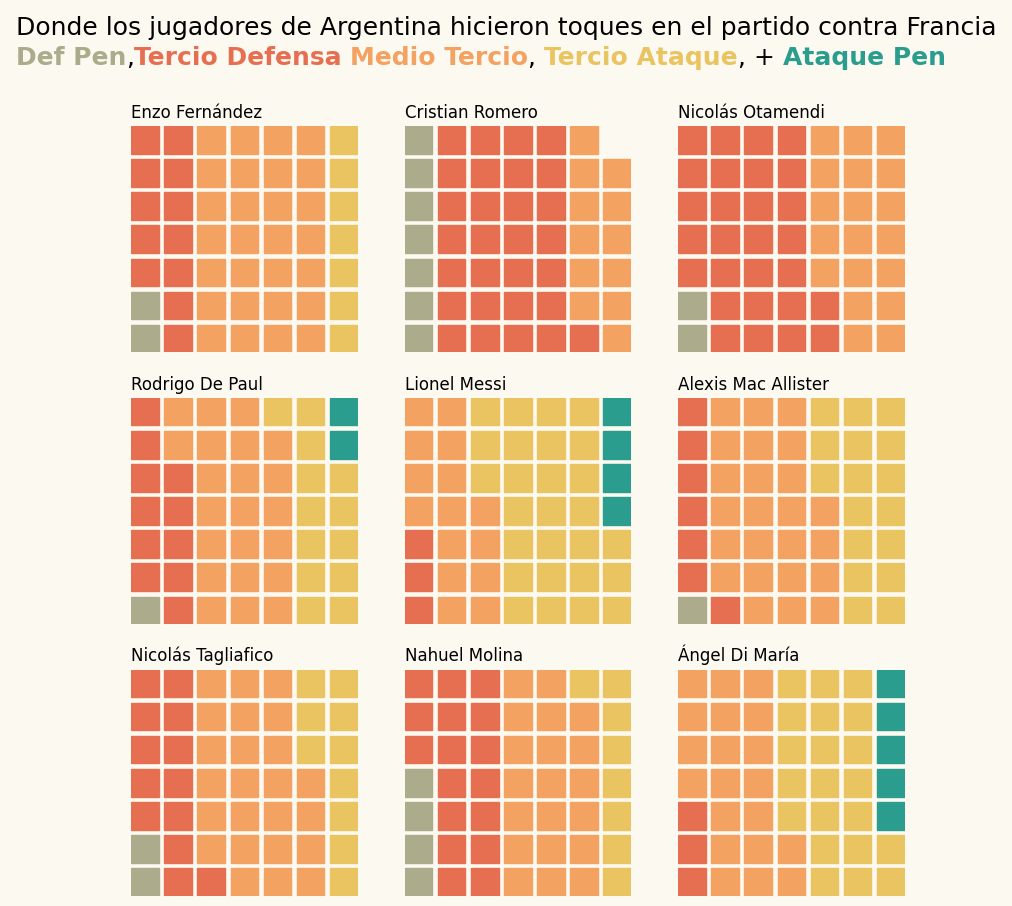

In [13]:
fig = plt.figure(
    FigureClass=Waffle,
    plots={
        331:{
            'values': final_pases.iloc[:,0],
            'title':{
                'label':lista[0],
                'color' :'black',
                'loc':'left'
            }
        },
        332:{
            'values': final_pases.iloc[:,1],
            'title':{
                'label':lista[1],
                'color' :'black',
                'loc':'left'
            }
          },
        333:{
            'values': final_pases.iloc[:,2],
            'title':{
                'label':lista[2],
                'color' :'black',
                'loc':'left'
            }
          },
        334:{
            'values': final_pases.iloc[:,3],
            'title':{
                'label':lista[3],
                'color' :'black',
                'loc':'left'
            }
          },
        335:{
            'values': final_pases.iloc[:,4],
            'title':{
                'label':lista[4],
                'color' :'black',
                'loc':'left'
            }
          },
        336:{
            'values': final_pases.iloc[:,5],
            'title':{
                'label':lista[5],
                'color' :'black',
                'loc':'left'
            }
          },
        337:{
            'values': final_pases.iloc[:,6],
            'title':{
                'label':lista[6],
                'color' :'black',
                'loc':'left'
            }
          },
        338:{
            'values': final_pases.iloc[:,7],
            'title':{
                'label':lista[7],
                'color' :'black',
                'loc':'left'
            }
          },
        339:{
            'values': final_pases.iloc[:,8],
            'title':{
                'label':lista[8],
                'color' :'black',
                'loc':'left'
            }
        },
    },
    rows=7,  # Outside parameter applied to all subplots, same as below
    columns = 7,
    figsize=(10, 10),
    colors = ('#acab8c','#e76f51','#f4a261','#e9c461','#2a9d8f')
)


fig_text(s = 'Donde los jugadores de Argentina hicieron toques en el partido contra ' + equipo + '\n<Def Pen>,<Tercio Defensa> <Medio Tercio>, <Tercio Ataque>, + <Ataque Pen>',
         x = .01, y=.99,
         fontsize = 18,
         color = 'black',
         highlight_textprops = [{"color": "#acab8c", "fontweight": "bold"},
                                {"color": "#e76f51", "fontweight": "bold"},
                                {"color": "#f4a261", "fontweight": "bold"},
                                {"color": "#e9c461", "fontweight": "bold"},
                                {"color": "#2a9d8f", "fontweight": "bold"}]
)

fig.patch.set_facecolor('#fcf9f0')

##Analisis de pases eventos

In [14]:
sb.competitions() #nos importa la competition_id = 43, el del mundial del futbol

,competition_id,season_id,country_name,competition_name,competition_gender,competition_youth,competition_international,season_name,match_updated,match_updated_360,match_available_360,match_available
0,9,27,Germany,1. Bundesliga,male,False,False,2015/2016,2023-12-12T07:43:33.436182,None,None,2023-12-12T07:43:33.436182
1,1267,107,Africa,African Cup of Nations,male,False,True,2023,2024-02-14T05:41:27.566989,None,None,2024-02-14T05:41:27.566989
2,16,4,Europe,Champions League,male,False,False,2018/2019,2023-03-07T12:20:48.118250,2021-06-13T16:17:31.694,None,2023-03-07T12:20:48.118250
3,16,1,Europe,Champions League,male,False,False,2017/2018,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2021-01-23T21:55:30.425330
4,16,2,Europe,Champions League,male,False,False,2016/2017,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2020-07-29T05:00
...,...,...,...,...,...,...,...,...,...,...,...,...
66,55,43,Europe,UEFA Euro,male,False,True,2020,2023-02-24T21:26:47.128979,2023-04-27T22:38:34.970148,2023-04-27T22:38:34.970148,2023-02-24T21:26:47.128979
67,35,75,Europe,UEFA Europa League,male,False,False,1988/1989,2023-06-18T19:28:39.443883,2021-06-13T16:17:31.694,None,2023-06-18T19:28:39.443883
68,53,106,Europe,UEFA Women's Euro,female,False,True,2022,2023-10-24T03:36:54.066267,2023-10-24T03:37:29.085948,2023-10-24T03:37:29.085948,2023-10-24T03:36:54.066267
69,72,107,International,Women's World Cup,female,False,True,2023,2023-12-12T14:06:50.626363,2023-12-12T14:12:41.561162,2023-12-12T14:12:41.561162,2023-12-12T14:06:50.626363


In [15]:
df = sb.matches(competition_id=43, season_id=106)
df

,match_id,match_date,kick_off,competition,season,home_team,away_team,home_score,away_score,match_status,...,last_updated_360,match_week,competition_stage,stadium,referee,home_managers,away_managers,data_version,shot_fidelity_version,xy_fidelity_version
0,3857256,2022-12-02,21:00:00.000,International - FIFA World Cup,2022,Serbia,Switzerland,2,3,available,...,2023-04-26T23:49:58.956186,3,Group Stage,Stadium 974,Fernando Andrés Rapallini,Dragan Stojković,Murat Yakin,1.1.0,2,2
1,3869151,2022-12-03,21:00:00.000,International - FIFA World Cup,2022,Argentina,Australia,2,1,available,...,2023-07-30T07:48:51.865595,4,Round of 16,Ahmad bin Ali Stadium,Szymon Marciniak,Lionel Sebastián Scaloni,Graham James Arnold,1.1.0,2,2
2,3857257,2022-11-30,17:00:00.000,International - FIFA World Cup,2022,Australia,Denmark,1,0,available,...,2023-06-20T11:04:37.638969,3,Group Stage,Al Janoub Stadium,Mustapha Ghorbal,Graham James Arnold,Kasper Hjulmand,1.1.0,2,2
3,3857258,2022-11-24,21:00:00.000,International - FIFA World Cup,2022,Brazil,Serbia,2,0,available,...,2023-07-11T14:56:31.096588,1,Group Stage,Lusail Stadium,Alireza Faghani,Telê Santana da Silva,Dragan Stojković,1.1.0,2,2
4,3857288,2022-11-26,12:00:00.000,International - FIFA World Cup,2022,Tunisia,Australia,0,1,available,...,2023-04-27T00:30:07.835815,2,Group Stage,Al Janoub Stadium,Daniel Siebert,Jalel Kadri,Graham James Arnold,1.1.0,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,3857265,2022-11-22,18:00:00.000,International - FIFA World Cup,2022,Mexico,Poland,0,0,available,...,2023-04-27T00:49:30.005344,1,Group Stage,Stadium 974,Chris Beath,Gerardo Daniel Martino,Czesław Michniewicz,1.1.0,2,2
60,3857262,2022-12-02,17:00:00.000,International - FIFA World Cup,2022,South Korea,Portugal,2,1,available,...,2023-04-26T23:48:08.999798,3,Group Stage,Education City Stadium,Facundo Tello Figueroa,Paulo Jorge Gomes Bento,Fernando Manuel Fernandes da Costa Santos,1.1.0,2,2
61,3857261,2022-11-29,21:00:00.000,International - FIFA World Cup,2022,Wales,England,0,3,available,...,2023-04-27T00:02:44.241621,3,Group Stage,Ahmad bin Ali Stadium,Slavko Vinčić,Robert Page,Gareth Southgate,1.1.0,2,2
62,3857255,2022-12-01,21:00:00.000,International - FIFA World Cup,2022,Japan,Spain,2,1,available,...,2023-04-26T23:51:48.352990,3,Group Stage,Sheikh Khalifa International Stadium,Victor Miguel de Freitas Gomes,Hajime Moriyasu,Luis Enrique Martínez García,1.1.0,2,2


In [16]:
from pandas.core.window.rolling import FixedWindowIndexer
lista_partidos = []

for index in range(0, len(df.index)):
  if(df.loc[index,'home_team'] == 'Argentina' or df.loc[index,'away_team'] == 'Argentina'):
    lista_partidos.append(df.loc[index,'match_id'])


In [17]:
MATCH_ID = lista_partidos[6]
print(MATCH_ID)

3857300


In [18]:
sb.competitions() #nos importa la competition_id = 43, el del mundial del futbol

,competition_id,season_id,country_name,competition_name,competition_gender,competition_youth,competition_international,season_name,match_updated,match_updated_360,match_available_360,match_available
0,9,27,Germany,1. Bundesliga,male,False,False,2015/2016,2023-12-12T07:43:33.436182,None,None,2023-12-12T07:43:33.436182
1,1267,107,Africa,African Cup of Nations,male,False,True,2023,2024-02-14T05:41:27.566989,None,None,2024-02-14T05:41:27.566989
2,16,4,Europe,Champions League,male,False,False,2018/2019,2023-03-07T12:20:48.118250,2021-06-13T16:17:31.694,None,2023-03-07T12:20:48.118250
3,16,1,Europe,Champions League,male,False,False,2017/2018,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2021-01-23T21:55:30.425330
4,16,2,Europe,Champions League,male,False,False,2016/2017,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2020-07-29T05:00
...,...,...,...,...,...,...,...,...,...,...,...,...
66,55,43,Europe,UEFA Euro,male,False,True,2020,2023-02-24T21:26:47.128979,2023-04-27T22:38:34.970148,2023-04-27T22:38:34.970148,2023-02-24T21:26:47.128979
67,35,75,Europe,UEFA Europa League,male,False,False,1988/1989,2023-06-18T19:28:39.443883,2021-06-13T16:17:31.694,None,2023-06-18T19:28:39.443883
68,53,106,Europe,UEFA Women's Euro,female,False,True,2022,2023-10-24T03:36:54.066267,2023-10-24T03:37:29.085948,2023-10-24T03:37:29.085948,2023-10-24T03:36:54.066267
69,72,107,International,Women's World Cup,female,False,True,2023,2023-12-12T14:06:50.626363,2023-12-12T14:12:41.561162,2023-12-12T14:12:41.561162,2023-12-12T14:06:50.626363


In [19]:
df = sb.matches(competition_id=43, season_id=106)
df

,match_id,match_date,kick_off,competition,season,home_team,away_team,home_score,away_score,match_status,...,last_updated_360,match_week,competition_stage,stadium,referee,home_managers,away_managers,data_version,shot_fidelity_version,xy_fidelity_version
0,3857256,2022-12-02,21:00:00.000,International - FIFA World Cup,2022,Serbia,Switzerland,2,3,available,...,2023-04-26T23:49:58.956186,3,Group Stage,Stadium 974,Fernando Andrés Rapallini,Dragan Stojković,Murat Yakin,1.1.0,2,2
1,3869151,2022-12-03,21:00:00.000,International - FIFA World Cup,2022,Argentina,Australia,2,1,available,...,2023-07-30T07:48:51.865595,4,Round of 16,Ahmad bin Ali Stadium,Szymon Marciniak,Lionel Sebastián Scaloni,Graham James Arnold,1.1.0,2,2
2,3857257,2022-11-30,17:00:00.000,International - FIFA World Cup,2022,Australia,Denmark,1,0,available,...,2023-06-20T11:04:37.638969,3,Group Stage,Al Janoub Stadium,Mustapha Ghorbal,Graham James Arnold,Kasper Hjulmand,1.1.0,2,2
3,3857258,2022-11-24,21:00:00.000,International - FIFA World Cup,2022,Brazil,Serbia,2,0,available,...,2023-07-11T14:56:31.096588,1,Group Stage,Lusail Stadium,Alireza Faghani,Telê Santana da Silva,Dragan Stojković,1.1.0,2,2
4,3857288,2022-11-26,12:00:00.000,International - FIFA World Cup,2022,Tunisia,Australia,0,1,available,...,2023-04-27T00:30:07.835815,2,Group Stage,Al Janoub Stadium,Daniel Siebert,Jalel Kadri,Graham James Arnold,1.1.0,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,3857265,2022-11-22,18:00:00.000,International - FIFA World Cup,2022,Mexico,Poland,0,0,available,...,2023-04-27T00:49:30.005344,1,Group Stage,Stadium 974,Chris Beath,Gerardo Daniel Martino,Czesław Michniewicz,1.1.0,2,2
60,3857262,2022-12-02,17:00:00.000,International - FIFA World Cup,2022,South Korea,Portugal,2,1,available,...,2023-04-26T23:48:08.999798,3,Group Stage,Education City Stadium,Facundo Tello Figueroa,Paulo Jorge Gomes Bento,Fernando Manuel Fernandes da Costa Santos,1.1.0,2,2
61,3857261,2022-11-29,21:00:00.000,International - FIFA World Cup,2022,Wales,England,0,3,available,...,2023-04-27T00:02:44.241621,3,Group Stage,Ahmad bin Ali Stadium,Slavko Vinčić,Robert Page,Gareth Southgate,1.1.0,2,2
62,3857255,2022-12-01,21:00:00.000,International - FIFA World Cup,2022,Japan,Spain,2,1,available,...,2023-04-26T23:51:48.352990,3,Group Stage,Sheikh Khalifa International Stadium,Victor Miguel de Freitas Gomes,Hajime Moriyasu,Luis Enrique Martínez García,1.1.0,2,2


In [20]:
from pandas.core.window.rolling import FixedWindowIndexer
lista_partidos = []

for index in range(0, len(df.index)):
  if(df.loc[index,'home_team'] == 'Argentina' or df.loc[index,'away_team'] == 'Argentina'):
    lista_partidos.append(df.loc[index,'match_id'])


In [21]:
MATCH_ID = lista_partidos[6]
print(MATCH_ID)

3857300


In [22]:

events_df = sb.events(match_id = MATCH_ID)

alineacion = sb.lineups(match_id=MATCH_ID)["Saudi Arabia"]

alineacion['player_name']

0               Abdullah Ibrahim Otayf
1             Salman Mohammed Al Faraj
2            Yasir Gharsan Al Shahrani
3            Salem Mohammed Al Dawsari
4                        Hattan Babhir
5                   Mohammed Al Burayk
6                       Mohammed Kanoo
7             Mohammed Khalil Al Owais
8                        Ali Albulayhi
9                    Abdulelah Al Amri
10                       Ali Al Hassan
11     Firas Tariq Nasser Al Albirakan
12              Abdullah Mohammed Madu
13              Saleh Khalid Al Shehri
14                    Riyadh Sharahili
15         Hassan Mohammed Al-Tambakti
16                 Sami Khalil Al Naji
17          Mohammed Al Rubaie Al Yami
18                Abdulrahman Al-Obood
19           Saud Abdullah Abdul Hamid
20                Nawaf Shaker Al Abid
21                       Nawaf Alaqidi
22      Abdulelah Saad Hameed Al-Malki
23    Sultan Abdullah Salim Al Ghannam
24                   Nasser Al Dawsari
25              Haitham M

In [23]:

#HACER UN DATA FRAME CON LAS COORDENADAS DE INICIO Y FINAL DE LOS PASES

arqueros = ['Franco Armani','Damián Emiliano Martínez','Gerónimo Rulli']
defensas = ['Gonzalo Ariel Montiel','Nahuel Molina Lucero','Germán Alejandro Pezzella','Cristian Gabriel Romero','Nicolás Hernán Otamendi','Lisandro Martínez','Nicolás Alejandro Tagliafico','Marcos Javier Acuña','Juan Marcos Foyth']
medios = ['Leandro Daniel Paredes','Guido Rodríguez','Enzo Fernandez','Exequiel Alejandro Palacios','Alejandro Darío Gómez','Rodrigo Javier De Paul','Alexis Mac Allister']
delanteros = ['Ángel Fabián Di María Hernández','Lionel Andrés Messi Cuccittini','Paulo Bruno Exequiel Dybala','Ángel Martín Correa','Lautaro Javier Martínez','Thiago Ezequiel Almada','Julián Álvarez']

#Jugadores de ArabiaSaudi - Saudi Arabia
arq = ['Mohammed Khalil Al Owais']
defe = ['Yasir Gharsan Al Shahrani','Ali Albulayhi','Hassan Mohammed Al-Tambakti','Saud Abdullah Abdul Hamid','Abdulelah Al Amri','Sultan Abdullah Salim Al Ghannam']
med = ['Abdulelah Saad Hameed Al-Malki','Salem Mohammed Al Dawsari','Mohammed Kanoo','Salman Mohammed Al Faraj','Firas Tariq Nasser Al Albirakan','Mohammed Al Burayk','Nawaf Shaker Al Abid']
delan = ['Saleh Khalid Al Shehri','Haitham Mohammed Asiri']

"""#Jugadores de Croacia - Croatia
arq = ['Dominik Livaković']
defe = ['Borna Sosa','Joško Gvardiol','Dejan Lovren','Josip Juranović']
med = ['Mateo Kovačić','Marcelo Brozović','Luka Modrić','Lovro Majer','Nikola Vlašić']
delan = ['Ivan Perišić','Andrej Kramarić','Mario Pašalić','Marko Livaja','Mislav Oršić','Bruno Petković']"""

"""#Jugadores de Mexico - Mexico
arq = ['Francisco Guillermo Ochoa Magaña']
defe = ['Jesús Daniel Gallardo Vasconcelos','Héctor Alfredo Moreno Herrera','César Jasib Montes Castro','Néstor Alejandro Araújo Razo','Kevin Nahin Álvarez Campos']
med = ['Héctor Miguel Herrera López','Roberto Carlos Alvarado Hernández','José Andrés Guardado Hernández','Luis Gerardo Chávez Magallón','Érick Gabriel Gutiérrez Galaviz']
delan = ['Ernesto Alexis Vega Rojas','Hirving Rodrigo Lozano Bahena','Carlos Uriel Antuna Romero','Raúl Alonso Jiménez Rodríguez']"""

"""#Jugadores de Polonia - Poland
arq = ['Wojciech Szczęsny']
defe = ['Bartosz Bereszyński','Jakub Piotr Kiwior','Kamil Glik','Matty Cash']
med = ['Przemysław Frankowski','Michał Skóraś','Grzegorz Krychowiak','Artur Jędrzejczyk','Krystian Bielik','Piotr Zieliński','Damian Szymański']
delan = ['Karol Świderski','Robert Lewandowski','Jakub Kamiński','Krzysztof Piątek']"""


"""#Jugadores de Australia
arq = ['Mathew Ryan']
defe = ['Aziz Eraltay Behich','Kye Rowles','Harry Souttar','Miloš Degenek','Thomas Deng']
med = ['Riley McGree','Aaron Mooy','Keanu Baccus','Mathew Leckie','Ajdin Hrustic']
delan = ['Jackson Irvine','Mitchell Thomas Duke','Garang Kuol','Jamie MacLaren','Craig Goodwin']"""


"""#Jugadores de Holanda - Netherlands
arq = ['Andries Noppert']
defe = ['Jurriën David Norman Timber','Virgil van Dijk','Nathan Aké']
med = ['Denzel Dumfries','Marten de Roon','Frenkie de Jong','Daley Blind','Davy Klaassen','Teun Koopmeiners']
delan = ['Cody Mathès Gakpo','Memphis Depay','Steven Berghuis','Noa Lang','Wout Weghorst','Luuk de Jong'] """

"""#Jugadores de Francia - France
arq = ['Hugo Lloris']
defe = ['Theo Bernard François Hernández','Dayotchanculle Upamecano','Raphaël Varane','Jules Koundé','Ibrahima Konaté','Axel Disasi']
med = ['Adrien Rabiot','Aurélien Djani Tchouaméni','Antoine Griezmann','Randal Kolo Muani','Eduardo Camavinga','Youssouf Fofana']
delan = ['Ousmane Dembélé','Kylian Mbappé Lottin','Olivier Giroud','Kingsley Coman','Marcus Thuram']"""


arqueros.extend(arq)
defensas.extend(defe)
medios.extend(med)
delanteros.extend(delan)

events_df = sb.events(match_id = MATCH_ID)


#events_df.columns
#df = events_df[(events_df['team_id'] == 38) & (events_df['type'] == 'Pass')].reset_index(drop=True) #sacamos los pases del Tottenham
df = events_df[(events_df['type'] == 'Pass')].reset_index(drop=True) #sacamos los pases del Tottenham

end = df['pass_end_location']
start = df['location']

pases = pd.DataFrame()

pases['equipo'] = None
pases['x_start'] = None
pases['y_start'] = None
pases['x_end'] = None
pases['y_end'] = None
pases['jugador'] = None
pases['posicion'] = None

for index in range(0, start.size):
  lista_start = start.iloc[index]
  lista_end = end.iloc[index]
  pases.loc[index,'equipo'] = df.loc[index,'team']
  pases.loc[index, 'x_start'] = lista_start[0]
  pases.loc[index, 'y_start'] = lista_start[1]
  pases.loc[index, 'x_end'] = lista_end[0]
  pases.loc[index, 'y_end'] = lista_end[1]
  pases.loc[index, 'jugador'] = df.loc[index, 'player']
  if(df.loc[index, 'player'] in arqueros):
    pases.loc[index, 'posicion'] = 'arquero'
  elif(df.loc[index, 'player'] in defensas):
    pases.loc[index, 'posicion'] = 'defensa'
  elif(df.loc[index, 'player'] in medios):
    pases.loc[index, 'posicion'] = 'medio'
  elif(df.loc[index, 'player'] in delanteros):
    pases.loc[index, 'posicion'] = 'delantero'


pases

,equipo,x_start,y_start,x_end,y_end,jugador,posicion
0,Saudi Arabia,61.0,40.1,44.8,41.9,Saleh Khalid Al Shehri,delantero
1,Saudi Arabia,46.6,41.9,58.5,40.6,Mohammed Kanoo,medio
2,Saudi Arabia,57.6,41.0,47.0,41.9,Saleh Khalid Al Shehri,delantero
3,Saudi Arabia,48.4,48.2,45.5,72.6,Mohammed Kanoo,medio
4,Saudi Arabia,52.5,72.6,87.0,73.3,Hassan Mohammed Al-Tambakti,defensa
...,...,...,...,...,...,...,...
927,Argentina,95.0,70.5,97.8,71.0,Lionel Andrés Messi Cuccittini,delantero
928,Argentina,45.2,58.3,27.2,44.4,Lisandro Martínez,defensa
929,Argentina,32.6,46.8,53.7,24.1,Damián Emiliano Martínez,arquero
930,Argentina,53.3,26.3,56.7,56.6,Enzo Fernandez,medio


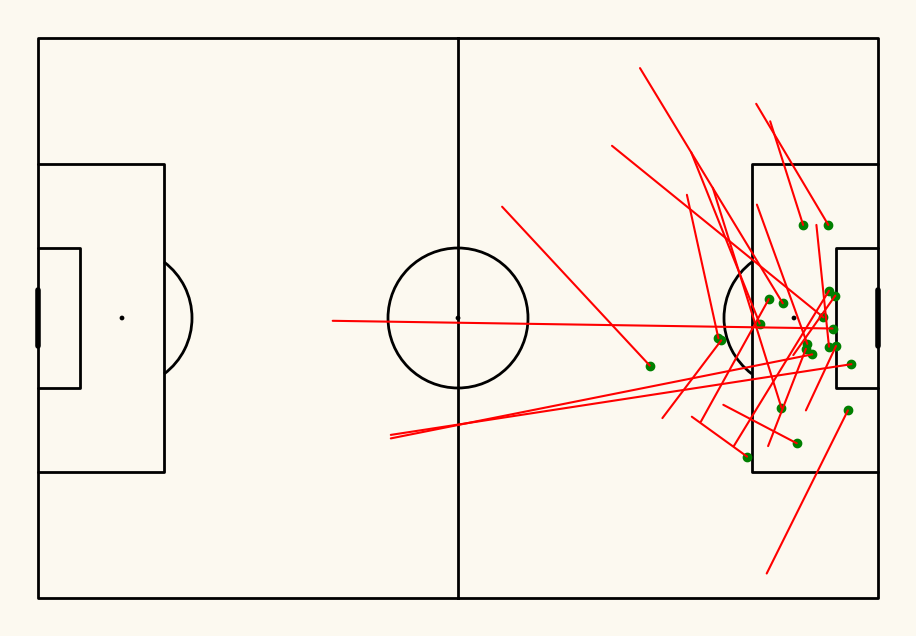

In [24]:
fig,ax = plt.subplots(figsize = (13.5,8))
fig.set_facecolor('#fcf9f0')
ax.patch.set_facecolor('#fcf9f0')

pitch = Pitch(pitch_type='statsbomb',
              pitch_color='#fcf9f0', line_color ='black')

pitch.draw(ax=ax)
plt.gca().invert_yaxis()


for i in range(0,len(pases['x_start'])):
  if(pases['posicion'][i] == 'arquero'):
    if(pases['equipo'][i] == 'Argentina'):
      plt.plot((120-pases['x_start'][i], 120 - pases['x_end'][i]), (80 - pases['y_start'][i],80 - pases['y_end'][i]), color = 'red')
      plt.scatter(120-pases['x_start'][i],80-pases['y_start'][i], color='green')
    """elif(pases['equipo'][i] == 'Tottenham Hotspur'):
      plt.plot((pases['x_start'][i], pases['x_end'][i]), (pases['y_start'][i],pases['y_end'][i]), color = 'blue')
      plt.scatter(pases['x_start'][i],pases['y_start'][i], color='white')"""

##Mapa de Tiros al arco (mapa de calor)

In [25]:
from mplsoccer import (VerticalPitch, Pitch, create_transparent_cmap,
                       FontManager, arrowhead_marker, Sbopen)

In [26]:
equipos = ['Saudi Arabia', 'Mexico', 'Poland', 'Australia', 'Netherlands', 'Croatia', 'France']

In [27]:
MATCH_ID = lista_partidos[0]
print(MATCH_ID)
df = sb.events(match_id = MATCH_ID)
df = df[df.shot_statsbomb_xg.isna()==False]

df = df[['team', 'timestamp', 'type',
       'under_pressure','shot_body_part','player','shot_outcome','shot_statsbomb_xg','play_pattern','period','location']].reset_index(drop=True)

# Convert timestamp column to datetime format
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Calculate the minute of each data point
df['minute'] = (df['period'] - 1) * 45 + df['timestamp'].dt.minute

# Adjust for periods 3 and 4
df.loc[df['period'] > 2, 'minute'] = 90 + (df['period'] - 3) * 15 + df['timestamp'].dt.minute

df['x'] =   df['location'].apply(lambda x: x[0])
df['y'] =   df['location'].apply(lambda x: x[1])

3869151


In [28]:
equipo = equipos[3]
df_temp = df[df['team'] == 'Argentina']
df_temp2 = df[df['team'] == equipo]

In [29]:
df_temp2

,team,timestamp,type,under_pressure,shot_body_part,player,shot_outcome,shot_statsbomb_xg,play_pattern,period,location,minute,x,y
1,Australia,2024-04-06 00:28:09,Shot,True,Head,Harry Souttar,Blocked,0.068095,From Corner,1,"[111.9, 44.0]",28,111.9,44.0
7,Australia,2024-04-06 00:31:09,Shot,NaN,Left Foot,Craig Goodwin,Blocked,0.013616,Regular Play,2,"[98.2, 22.6]",76,98.2,22.6
8,Australia,2024-04-06 00:35:08,Shot,NaN,Right Foot,Aziz Eraltay Behich,Blocked,0.077217,From Free Kick,2,"[110.6, 33.2]",80,110.6,33.2
9,Australia,2024-04-06 00:35:41,Shot,True,Left Foot,Ajdin Hrustic,Off T,0.033247,From Corner,2,"[100.0, 52.7]",80,100.0,52.7
18,Australia,2024-04-06 00:51:36,Shot,NaN,Right Foot,Garang Kuol,Saved,0.233942,Regular Play,2,"[113.1, 49.4]",96,113.1,49.4


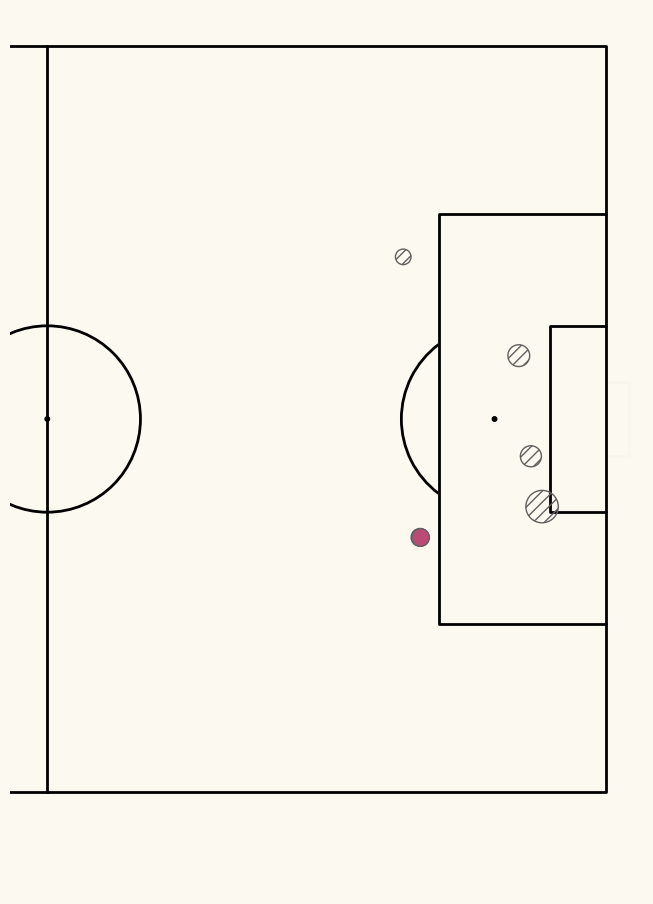

In [30]:
pitch = Pitch(pitch_type='statsbomb', goal_type='box', goal_alpha=0.01, pitch_color='#fcf9f0', line_color='black', half=True)

fig, axs = pitch.grid(figheight=10, title_height=0, endnote_space=0, axis=False,title_space=0, grid_height=0.82)
fig.set_facecolor("#fcf9f0")

"""

sc1 = pitch.scatter(df_temp.x, df_temp.y,
                    s=(df_temp.shot_statsbomb_xg * 1900) + 100,
                    edgecolors='#606060',
                    c='None',
                    hatch='///',
                    marker='o',
                    ax=axs['pitch'])

home_goals = df[(df['team'] == 'Argentina') & (df['shot_outcome'] == 'Goal') & (df['period'] < 5)]

"""

sc1 = pitch.scatter(df_temp2.x, df_temp2.y,
                    s=(df_temp2.shot_statsbomb_xg * 1900) + 100,
                    edgecolors='#606060',
                    c='None',
                    hatch='///',
                    marker='o',
                    ax=axs['pitch'])
home_goals = df[(df['team'] == equipo) & (df['shot_outcome'] == 'Off T') & (df['period'] < 5)]

sc2 = pitch.scatter(home_goals.x, home_goals.y,
                    s=(home_goals.shot_statsbomb_xg * 1900) + 100,
                    edgecolors='#606060',
                    c='#b94b75',
                    marker='o',
                    ax=axs['pitch'])


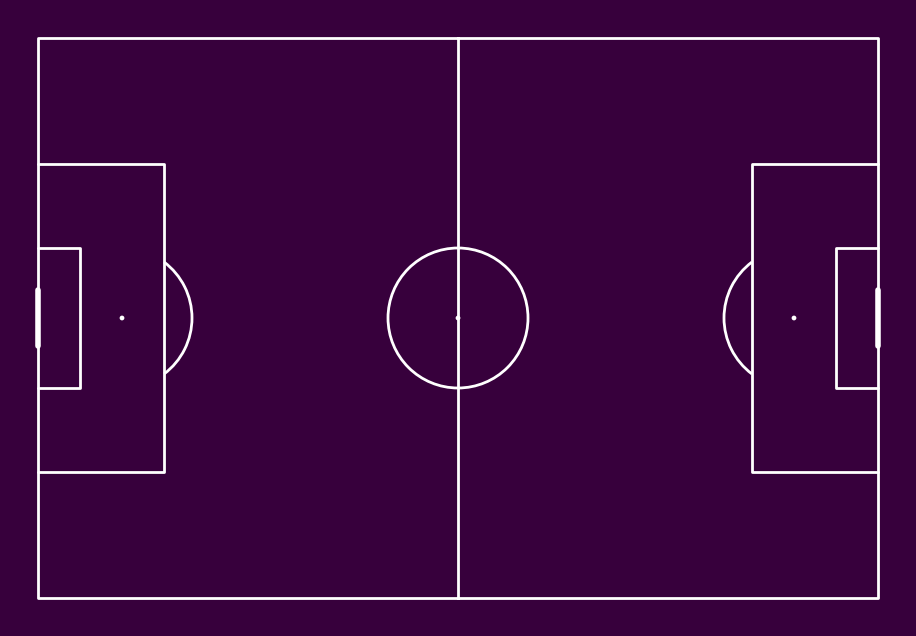

In [31]:
fig,ax = plt.subplots(figsize = (13.5,8))
fig.set_facecolor('#37003c')
ax.patch.set_facecolor('#37003c')

pitch = Pitch(pitch_type='statsbomb',
              pitch_color='#37003c', line_color ='white')

pitch.draw(ax=ax)
plt.gca().invert_yaxis()



In [32]:
pitch = Pitch(pitch_type='statsbomb', goal_alpha=0.01, pitch_color='white', line_color='#37003c', half=True)